# Variations in $\delta^{18}$O records

In [158]:
import numpy
import math
import matplotlib.pyplot as plt
import csv
from scipy import fftpack, interpolate

In [192]:
age = []
con = []

with open('./LR04stack.csv') as data_file:
    csvReader = csv.reader( data_file )
    for row in csvReader:
        age.append( row[0] )
        con.append( row[1] )
print( [ age[0], con[0] ] )
age_data = [ float(x) for x in age[1:] ]
age_max = int( age_data[-1] )
con_data = [ float(x) for x in con[1:] ]

with open( './orbit/orbit91' ) as orbit_file:
    orbit_header_0 = next( orbit_file )
    orbit_header_1 = next( orbit_file )
    orbit_data = orbit_file.readlines()
print( [ orbit_header_0, orbit_header_1 ] )
orbit_data = [ [ float(y) for y in x.split() ] for x in orbit_data[1:] ]

['Age [ka BP]', 'Foram bent d18O [per mil PDB]']
['                                                     INSOLATION\n', '          ECC      OMEGA   OBL       PREC   65NJul  65SJan  15NJul  15SJan\n']


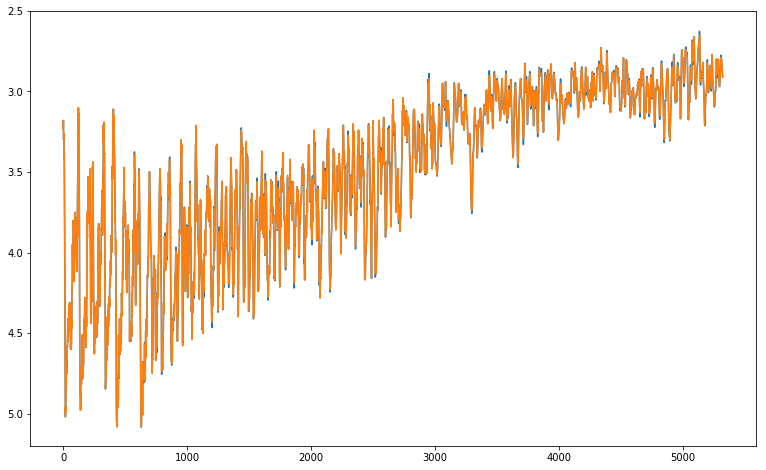

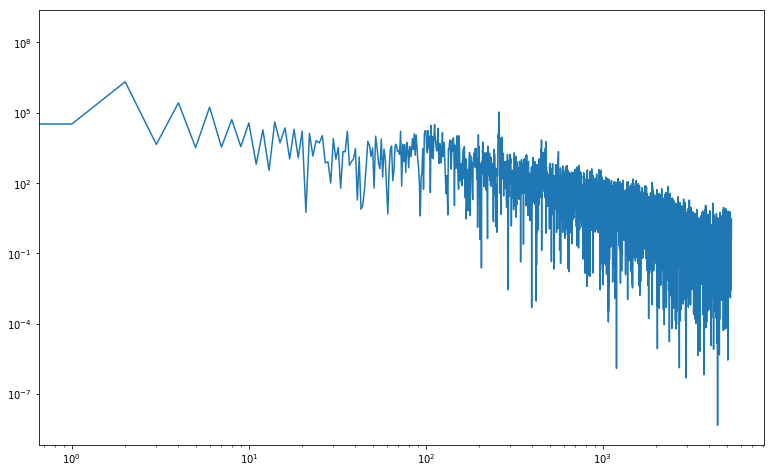

In [206]:
con_data_intp = interpolate.interp1d( age_data, con_data, kind = 'cubic' )
age_lin = numpy.linspace( 0, age_max, age_max )

fig = plt.figure( figsize = (13,8) )
ax = plt.gca()
plt.plot( age_lin, con_data_intp(age_lin) )
plt.plot( age_data, con_data )
ax.set_ylim( 5.2, 2.5 )
plt.show()

freq_data = [ abs(x)**2 for x in fftpack.rfft( con_data_intp( age_lin ) ) ]

fig = plt.figure( figsize = (13,8) )
ax = plt.gca()
plt.loglog( freq_data )
plt.show()

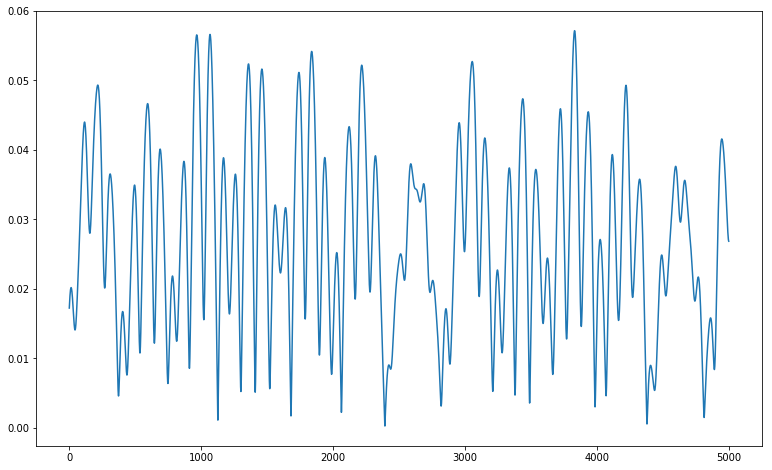

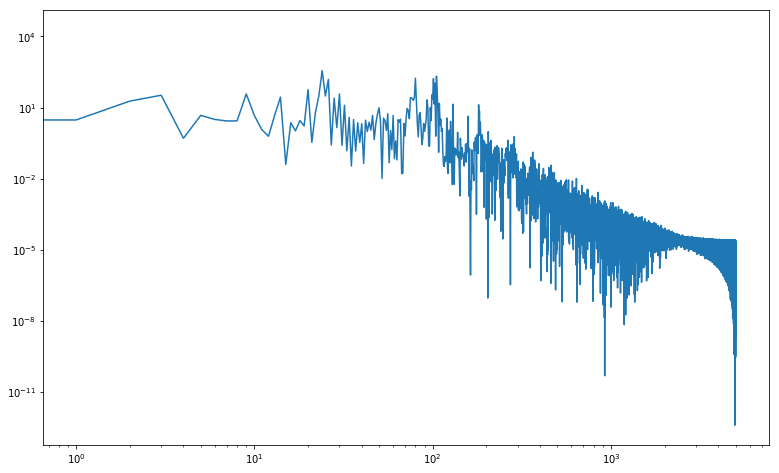

In [200]:
fig = plt.figure( figsize = (13,8) )
ax = plt.gca()
plt.plot( [ -x[0] for x in orbit_data ], [ x[1] for x in orbit_data ] )
plt.show()

orbit_freq = [ abs(x)**2 for x in fftpack.rfft( [ x[1] for x in orbit_data ] ) ]

fig = plt.figure( figsize = (13,8) )
ax = plt.gca()
plt.loglog( orbit_freq )
plt.show()

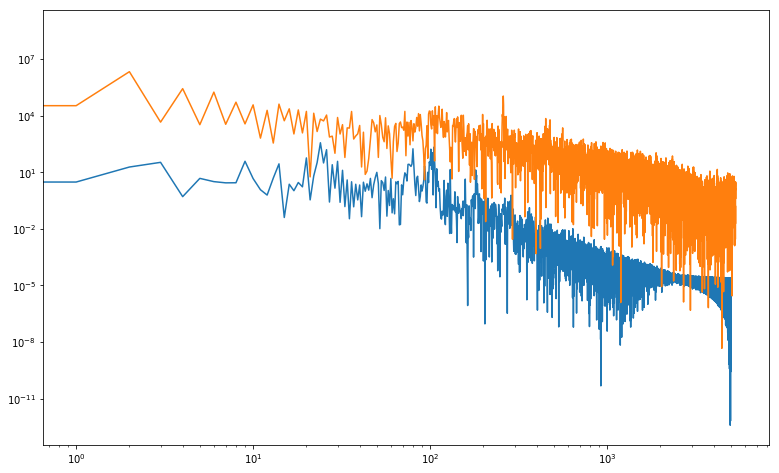

In [201]:
fig = plt.figure( figsize = (13,8) )
ax = plt.gca()
plt.loglog( orbit_freq )
plt.loglog( freq_data )
plt.show()